In [17]:
# Importing all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Loading the dataset
data = pd.read_csv("D:/data/synthetic_beverage_sales_data.csv")

In [4]:
print(data.shape)

(8999910, 11)


In [21]:
# Displaying initial 5 rows 
print(data.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


In [23]:
# Checking Columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [27]:
# Checking for null-values
data.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

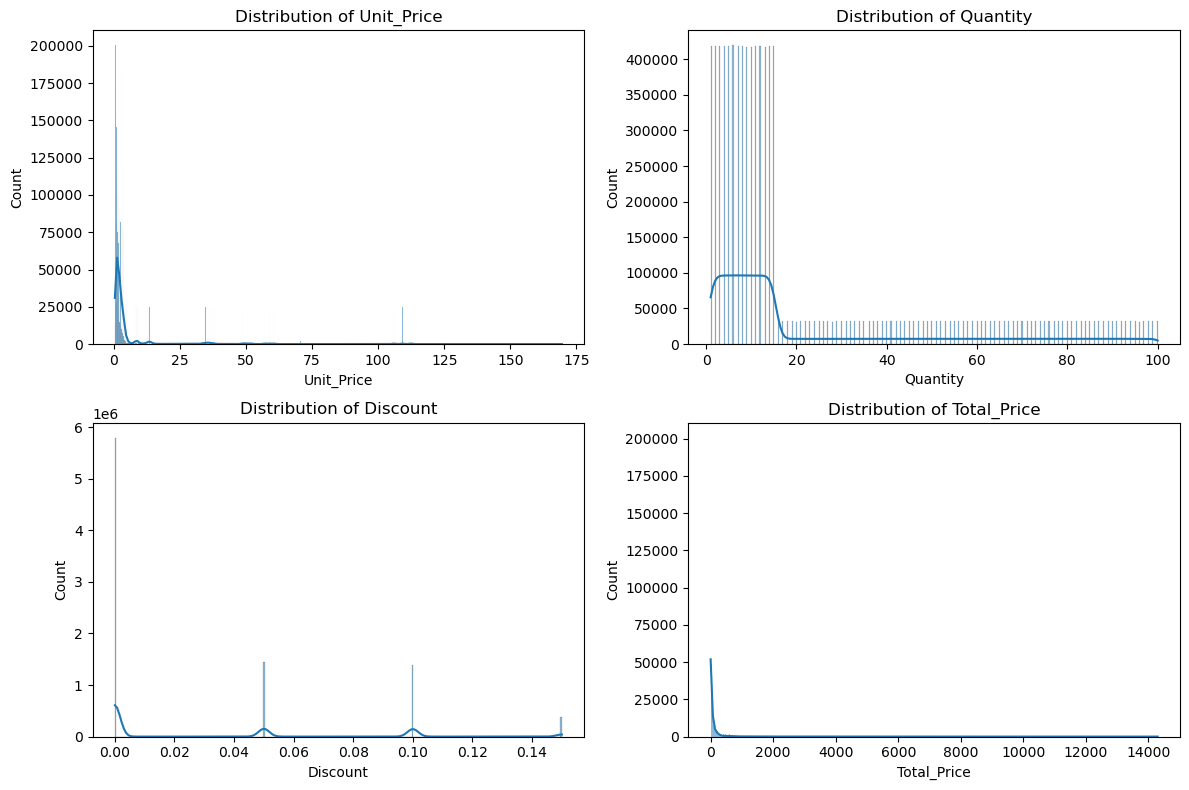

In [31]:
# Define numerical columns for visualization
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']  

# Set figure size for better readability
plt.figure(figsize=(12, 8))  

# Loop through each numerical column and create histograms
for i, col in enumerate(num_cols, 1):  
    plt.subplot(2, 2, i)  # Create a 2x2 subplot layout
    sns.histplot(data[col], kde=True)  # Plot histogram with KDE to show distribution
    plt.title(f'Distribution of {col}')  # Set plot title

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

# This plot helps analyze the distribution, skewness, and presence of outliers in numerical features.

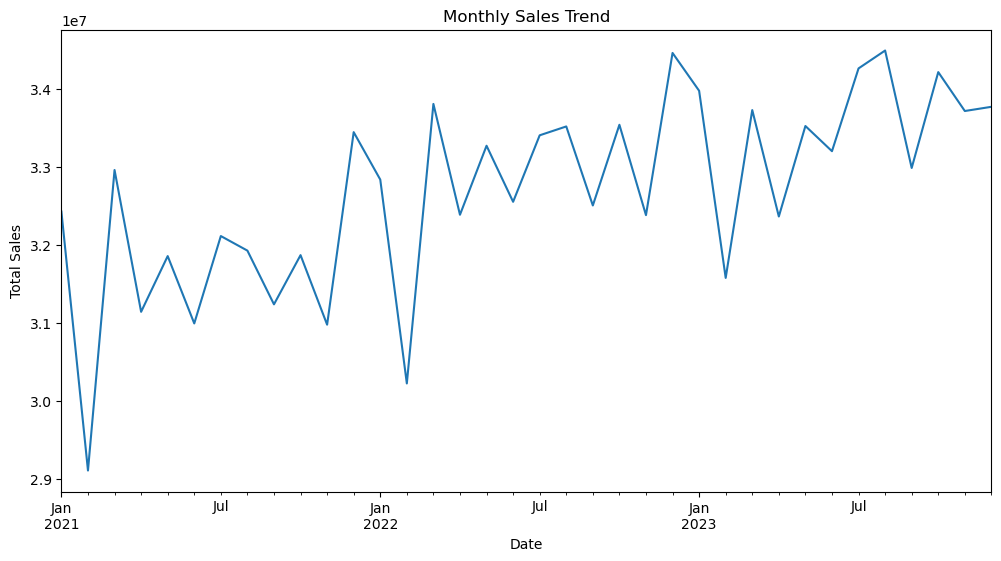

In [32]:
# Convert 'Order_Date' column to datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Set 'Order_Date' as index and resample total sales on a monthly basis
data.set_index('Order_Date')['Total_Price'].resample('ME').sum().plot(figsize=(12, 6))  

# Set plot title and axis labels
plt.title('Monthly Sales Trend')  
plt.xlabel('Date')  
plt.ylabel('Total Sales')  

# Display the time series plot
plt.show()

# This plot helps visualize sales trends over time and identify seasonal patterns or fluctuations.

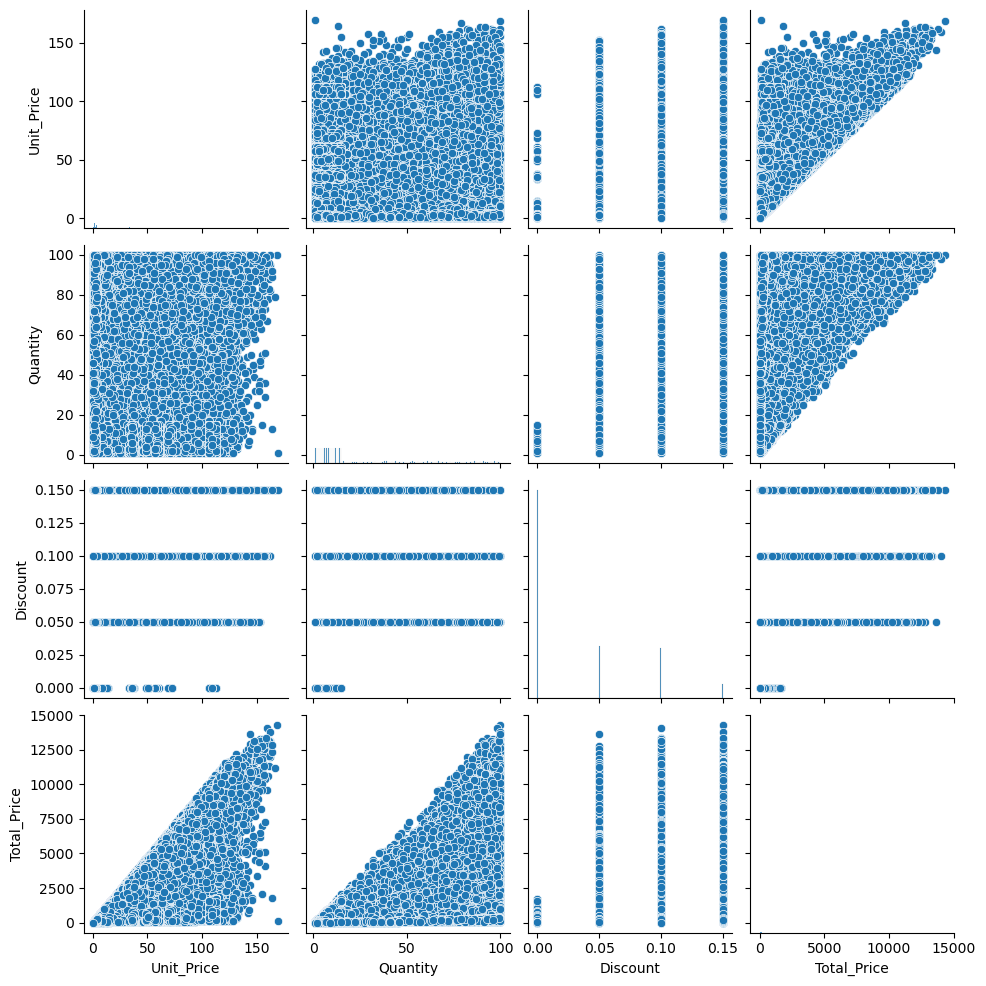

In [33]:
# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(data[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']])  

# Display the plot
plt.show()

# This plot helps identify correlations, patterns, and potential linear relationships between numerical features.

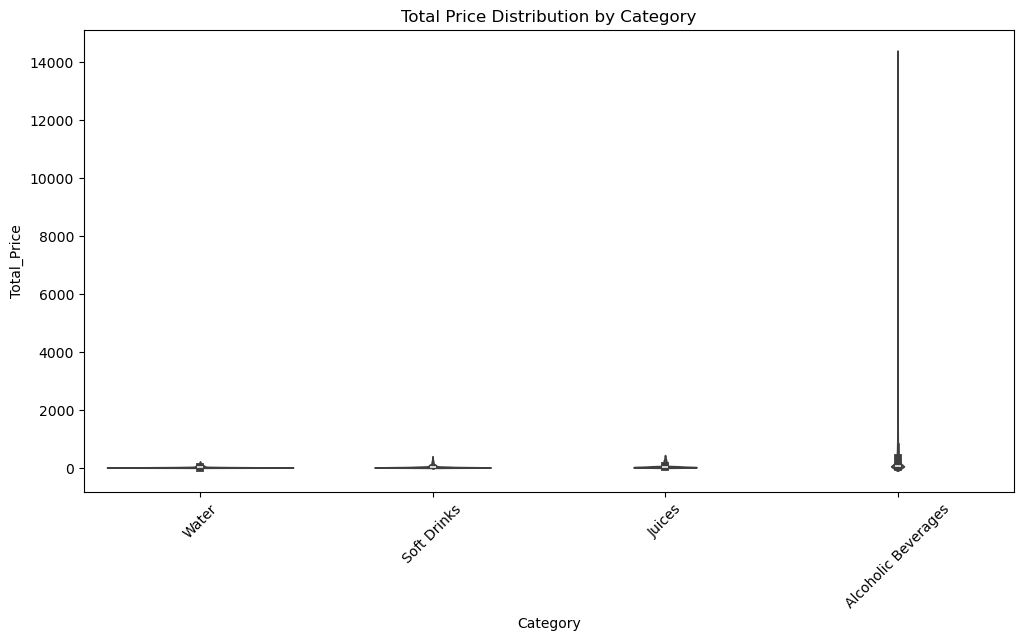

In [36]:
# Set figure size for better readability
plt.figure(figsize=(12, 6))  

# Create a violin plot to visualize the distribution of Total_Price by Category
sns.violinplot(x='Category', y='Total_Price', data=data)  

# Set plot title and rotate x-axis labels for better readability
plt.title('Total Price Distribution by Category')  
plt.xticks(rotation=45)  

# Display the plot
plt.show()

# This plot helps compare the distribution and spread of total prices across different product categories.

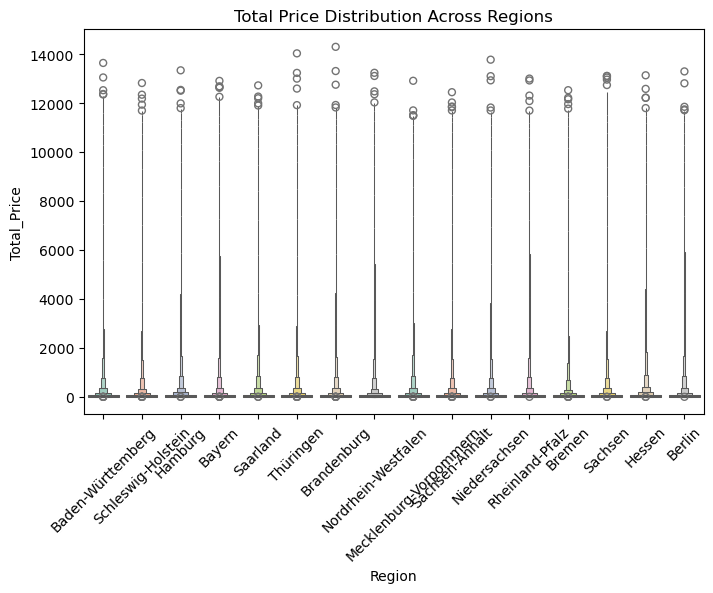

In [37]:
# Set figure size for better readability
plt.figure(figsize=(8, 5))  

# Create a boxen plot to visualize the distribution of Total_Price across different Regions
sns.boxenplot(x='Region', y='Total_Price', hue='Region', data=data, palette='Set2', legend=False)  

# Set plot title and rotate x-axis labels for better readability
plt.title('Total Price Distribution Across Regions')  
plt.xticks(rotation=45)  

# Display the plot
plt.show()

# This plot helps visualize the variation and distribution of total prices across different regions.

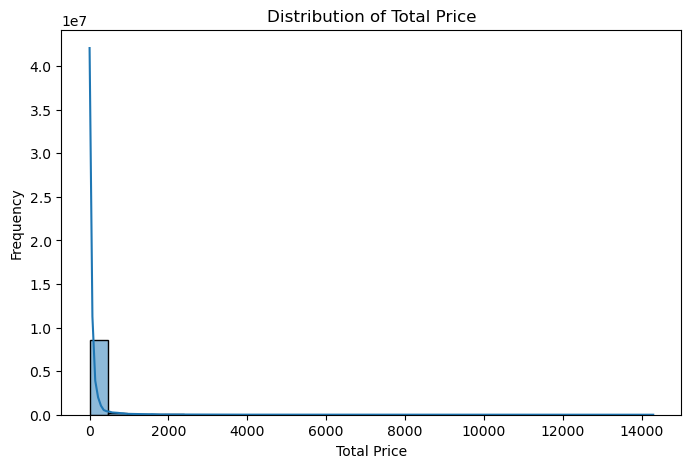

In [38]:
# Set figure size for better readability
plt.figure(figsize=(8, 5))

# Create a histogram with KDE to visualize the distribution of Total_Price
sns.histplot(data['Total_Price'], bins=30, kde=True)

# Set plot title and axis labels
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# This plot helps visualize the distribution, spread, and potential skewness of the Total Price variable.

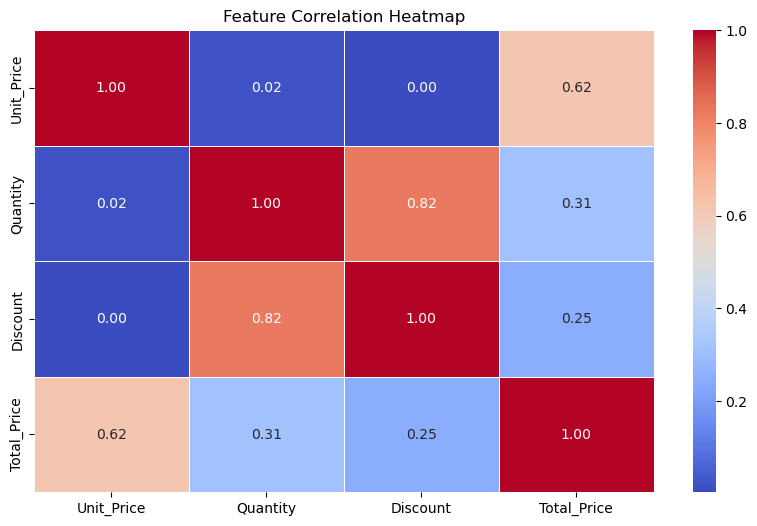

In [39]:
# Set figure size for better readability
plt.figure(figsize=(10, 6))

# Select only numeric columns from the dataset
numeric_df = data.select_dtypes(include=['number'])

# Create a heatmap to visualize correlations between numerical features
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set plot title and display the heatmap
plt.title('Feature Correlation Heatmap')
plt.show()

# This plot helps identify relationships and correlations between numerical features, which can guide feature selection.

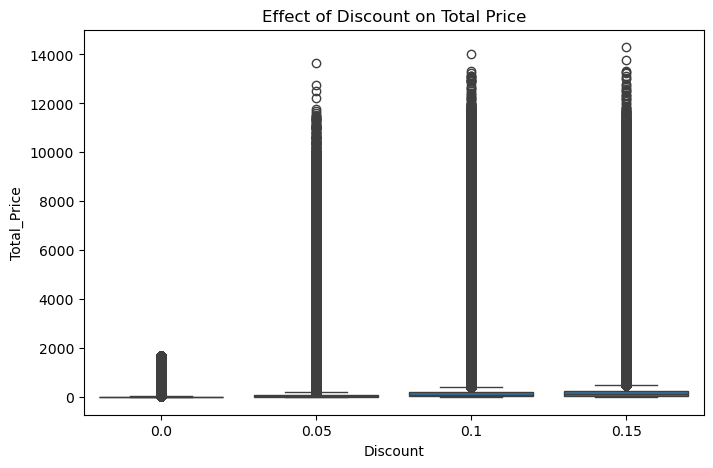

In [47]:
# Set figure size for better readability
plt.figure(figsize=(8, 5))

# Create a boxplot to visualize the effect of Discount on Total Price
sns.boxplot(x='Discount', y='Total_Price', data=data)

# Set plot title and display the plot
plt.title('Effect of Discount on Total Price')
plt.show()

# This plot helps analyze how different discount values affect the total price distribution.

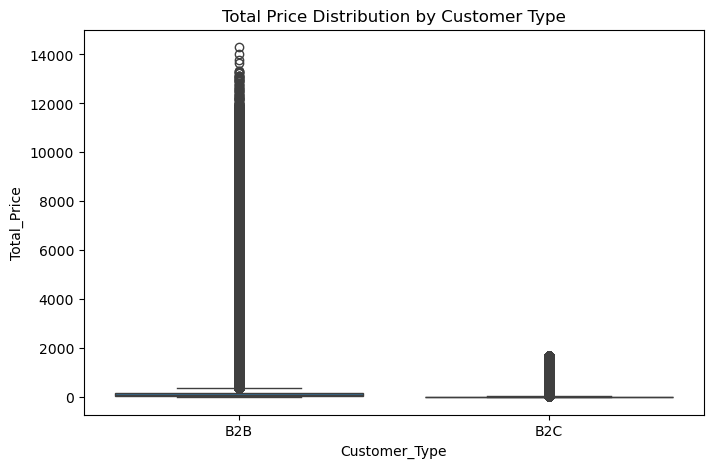

In [49]:
# Set figure size for better readability
plt.figure(figsize=(8, 5))

# Create a boxplot to visualize the distribution of Total Price by Customer Type
sns.boxplot(x='Customer_Type', y='Total_Price', data=data)

# Set plot title and display the plot
plt.title('Total Price Distribution by Customer Type')
plt.show()

# This plot helps compare the total price distribution across different customer types (B2B vs. B2C).